In [84]:
#Dependencies
import pandas as pd
import numpy as np
from scipy.stats import poisson, skellam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [85]:
#load in datasets
matches = pd.read_csv("epl_matches.csv", index_col=0) 
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,Match Report,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,Match Report,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,Match Report,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town


In [86]:
# Get the shape
matches.shape

(4366, 27)

In [87]:
# How many Matches each team has played. Keep in mind of relegation and promotion rules.
matches["team"].value_counts()

team
West Ham United             219
Arsenal                     218
Crystal Palace              218
Manchester City             218
Everton                     218
Tottenham Hotspur           218
Manchester United           218
Brighton and Hove Albion    218
Wolverhampton Wanderers     218
Newcastle United            218
Liverpool                   218
Chelsea                     217
Leicester City              190
Southampton                 190
Aston Villa                 181
Burnley                     181
Fulham                      143
Bournemouth                 142
Watford                     114
Leeds United                114
Brentford                   105
Sheffield United            104
Norwich City                 76
Nottingham Forest            67
West Bromwich Albion         38
Cardiff City                 38
Huddersfield Town            38
Luton Town                   29
Name: count, dtype: int64

In [88]:
# Datatype of each value
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [89]:
#convert date to date-time
matches["date"] = pd.to_datetime(matches["date"])
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [90]:
# setting the venue code

matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches
# 0 = away 
# 1 = home

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal,1
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal,1
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal,1
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,NaN,7.0,1.0,18.9,1.0,0,0,2019,Huddersfield Town,0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,NaN,13.0,3.0,18.1,1.0,0,0,2019,Huddersfield Town,1
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,NaN,5.0,1.0,21.6,0.0,0,0,2019,Huddersfield Town,0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,NaN,7.0,3.0,19.0,1.0,0,0,2019,Huddersfield Town,1


In [91]:
# Create numeric codes for each unique 'opponent' value and store them in a new column 'opp_code'.
matches["opp_code"] = matches["opponent"].astype("category").cat.codes


In [92]:
# Extract the hour component from the 'time' column and store it as integers in a new column named 'hour'.
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,7.0,19.1,0.0,0,0,2024,Arsenal,1,20,12
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,2.0,16.4,0.0,1,1,2024,Arsenal,0,8,20
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,9.0,13.8,0.0,1,1,2024,Arsenal,1,10,15
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,5.0,15.0,0.0,0,0,2024,Arsenal,1,17,16
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,4.0,17.4,0.0,0,0,2024,Arsenal,0,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,1.0,18.9,1.0,0,0,2019,Huddersfield Town,0,23,12
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,3.0,18.1,1.0,0,0,2019,Huddersfield Town,1,24,15
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,1.0,21.6,0.0,0,0,2019,Huddersfield Town,0,14,20
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,3.0,19.0,1.0,0,0,2019,Huddersfield Town,1,17,14


In [93]:
# Add a new column 'day_code' to the 'matches' DataFrame, containing the day of the week from the 'date' column.

matches["day_code"] = matches["date"].dt.dayofweek
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,19.1,0.0,0,0,2024,Arsenal,1,20,12,5
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,16.4,0.0,1,1,2024,Arsenal,0,8,20,0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,13.8,0.0,1,1,2024,Arsenal,1,10,15,5
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,15.0,0.0,0,0,2024,Arsenal,1,17,16,6
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,17.4,0.0,0,0,2024,Arsenal,0,9,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,18.9,1.0,0,0,2019,Huddersfield Town,0,23,12,5
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,18.1,1.0,0,0,2019,Huddersfield Town,1,24,15,5
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,21.6,0.0,0,0,2019,Huddersfield Town,0,14,20,4
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,19.0,1.0,0,0,2019,Huddersfield Town,1,17,14,6


In [94]:
#target will be if team won lost or drawn
conditions = [
    (matches["result"] == "W"),  # Win condition
    (matches["result"] == "L"),  # Lose condition
    (matches["result"] == "D")   # Draw condition
]

values = [1, -1, 0]  # 1 for win, -1 for lose, 0 for draw
matches["target"] = np.select(conditions, values, default=np.nan)
# # Apply np.select to create the 'target' column based on the defined conditions and values
matches


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,0.0,0,0,2024,Arsenal,1,20,12,5,1.0
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,0.0,1,1,2024,Arsenal,0,8,20,0,1.0
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,0.0,1,1,2024,Arsenal,1,10,15,5,0.0
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,0.0,0,0,2024,Arsenal,1,17,16,6,1.0
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,0.0,0,0,2024,Arsenal,0,9,16,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,Tottenham,...,1.0,0,0,2019,Huddersfield Town,0,23,12,5,-1.0
36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,Watford,...,1.0,0,0,2019,Huddersfield Town,1,24,15,5,-1.0
37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,Liverpool,...,0.0,0,0,2019,Huddersfield Town,0,14,20,4,-1.0
38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,Manchester Utd,...,1.0,0,0,2019,Huddersfield Town,1,17,14,6,0.0


In [95]:
#add a column based on results called "numeric result" that will be set to 1 if the team won, -1 if the team lost, and 0 if the game was a draw. 

In [96]:
# Sort the DataFrame by team and date
matches = matches.sort_values(['team', 'date'])

# Calculate the sum of the results of the last 10 matches for each team
matches['last_5_results'] = matches.groupby('team')['target'].rolling(5).sum().reset_index(0, drop=True)

matches.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,last_5_results
28,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,...,0,0,2024,Wolverhampton Wanderers,1,3,15,5,-1.0,0.0
29,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,...,0,0,2024,Wolverhampton Wanderers,0,23,15,5,1.0,0.0
30,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Home,W,1.0,0.0,Sheffield Utd,...,0,0,2024,Wolverhampton Wanderers,1,21,13,6,1.0,1.0
32,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,L,0.0,3.0,Newcastle Utd,...,0,0,2024,Wolverhampton Wanderers,0,18,15,5,-1.0,1.0
33,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Home,W,2.0,1.0,Fulham,...,0,0,2024,Wolverhampton Wanderers,1,10,15,5,1.0,1.0


In [97]:
# Sort the DataFrame by opponent and date
matches = matches.sort_values(['opponent', 'date'])

# Calculate the mean of the results of the last 10 matches for each opponent
matches['opp_last_5_results'] = matches.groupby('opponent')['target'].rolling(5).sum().reset_index(0, drop=True)

matches.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,venue_code,opp_code,hour,day_code,target,last_5_results,opp_last_5_results
26,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Away,W,2.0,0.0,Wolves,...,0,2024,Brentford,0,27,15,5,1.0,-1.0,0.0
27,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Home,L,1.0,2.0,Wolves,...,0,2024,Tottenham Hotspur,1,27,15,5,-1.0,1.0,0.0
28,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Away,L,0.0,1.0,Wolves,...,0,2024,Sheffield United,0,27,13,6,-1.0,-3.0,-1.0
38,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Home,W,3.0,0.0,Wolves,...,0,2024,Newcastle United,1,27,15,5,1.0,1.0,-1.0
35,2024-03-09,15:00,Premier League,Matchweek 28,Sat,Away,L,1.0,2.0,Wolves,...,0,2024,Fulham,0,27,15,5,-1.0,1.0,-1.0


In [98]:
matches_cols = matches.columns.tolist()
matches_cols

['date',
 'time',
 'comp',
 'round',
 'day',
 'venue',
 'result',
 'gf',
 'ga',
 'opponent',
 'xg',
 'xga',
 'poss',
 'attendance',
 'captain',
 'formation',
 'referee',
 'match report',
 'notes',
 'sh',
 'sot',
 'dist',
 'fk',
 'pk',
 'pkatt',
 'season',
 'team',
 'venue_code',
 'opp_code',
 'hour',
 'day_code',
 'target',
 'last_5_results',
 'opp_last_5_results']

In [99]:
matches = matches[['date', 'time','comp','round','day','venue','result','gf','ga','opponent','xg','xga','poss','attendance','captain','formation','referee','match report',
'notes',
'sh',
'sot',
'dist',
'fk',
'pk',
'pkatt',
'season',
'team',
'venue_code',
'opp_code',
'hour',
'day_code',
'last_5_results',
'opp_last_5_results', 'target']]

matches


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,venue_code,opp_code,hour,day_code,last_5_results,opp_last_5_results,target
1,2018-08-12,16:00,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Arsenal,...,0,2019,Manchester City,0,0,16,6,NaN,NaN,1.0
2,2018-08-18,17:30,Premier League,Matchweek 2,Sat,Home,W,3.0,2.0,Arsenal,...,0,2019,Chelsea,1,0,17,5,NaN,NaN,1.0
2,2018-08-25,15:00,Premier League,Matchweek 3,Sat,Away,L,1.0,3.0,Arsenal,...,0,2019,West Ham United,0,0,15,5,NaN,NaN,-1.0
4,2018-09-02,13:30,Premier League,Matchweek 4,Sun,Home,L,2.0,3.0,Arsenal,...,0,2019,Cardiff City,1,0,13,6,NaN,NaN,-1.0
5,2018-09-15,15:00,Premier League,Matchweek 5,Sat,Home,L,1.0,2.0,Arsenal,...,0,2019,Newcastle United,1,0,15,5,-4.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Away,W,2.0,0.0,Wolves,...,0,2024,Brentford,0,27,15,5,-1.0,0.0,1.0
27,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Home,L,1.0,2.0,Wolves,...,0,2024,Tottenham Hotspur,1,27,15,5,1.0,0.0,-1.0
28,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Away,L,0.0,1.0,Wolves,...,0,2024,Sheffield United,0,27,13,6,-3.0,-1.0,-1.0
38,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Home,W,3.0,0.0,Wolves,...,0,2024,Newcastle United,1,27,15,5,1.0,-1.0,1.0


In [100]:
#replace all NaN values in the last_10_results and the opp_last_10_results with the median value of those column
matches['last_5_results'].fillna(matches['last_5_results'].median(), inplace=True)
matches['opp_last_5_results'].fillna(matches['opp_last_5_results'].median(), inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4366 entries, 1 to 35
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4366 non-null   datetime64[ns]
 1   time                4366 non-null   object        
 2   comp                4366 non-null   object        
 3   round               4366 non-null   object        
 4   day                 4366 non-null   object        
 5   venue               4366 non-null   object        
 6   result              4366 non-null   object        
 7   gf                  4366 non-null   float64       
 8   ga                  4366 non-null   float64       
 9   opponent            4366 non-null   object        
 10  xg                  4366 non-null   float64       
 11  xga                 4366 non-null   float64       
 12  poss                4366 non-null   float64       
 13  attendance          3484 non-null   float64       
 14 

In [101]:
#random forest classifier
# Define the list of predictors including venue code, opponent code, hour, and day code.
predictors = ["venue_code", "opp_code", "hour", "day_code","opp_last_5_results", "last_5_results", "sot"]

# Define the features (predictors) and the target variable
X = matches[predictors]
y = matches["target"]

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Initialize a Random Forest classifier with 50 trees, minimum samples split of 10, and a fixed random state.
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=1)

# Train the Random Forest classifier on the training data using specified predictors.
rf_model = rf_model.fit(X_train, y_train)

In [102]:
# Generate predictions using the trained Random Forest classifier on the test data using specified predictors.
y_preds = rf_model.predict(X_test)

In [103]:
# Calculate accuracy score for the training data
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))

# Calculate accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7669517409896152
Testing Accuracy: 0.6373626373626373


In [104]:
# Create a contingency table showing the counts of actual versus predicted labels
combined = pd.DataFrame({"actual": y_test, "prediction": y_preds})
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,-1.0,0.0,1.0
actual,,,
-1.0,347,15,64
0.0,121,21,122
1.0,59,15,328


In [105]:
# determine which feature explains the most variance in the model
importances = rf_model.feature_importances_
# return the original feature names
feature_names = X.columns
#create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance

,feature,importance
0,venue_code,0.024884
1,opp_code,0.103432
2,hour,0.060033
3,day_code,0.046022
4,opp_last_5_results,0.295513
5,last_5_results,0.292697
6,sot,0.177419


<Axes: xlabel='importance', ylabel='feature'>

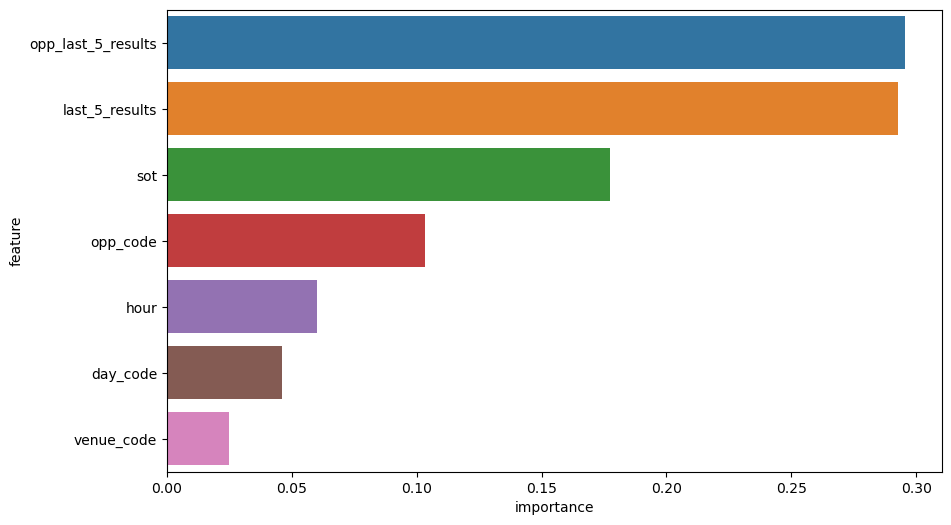

In [106]:
#create a bar plot to visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False))

In [107]:
# Generate classification report
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

        -1.0       0.66      0.81      0.73       426
         0.0       0.41      0.08      0.13       264
         1.0       0.64      0.82      0.72       402

    accuracy                           0.64      1092
   macro avg       0.57      0.57      0.53      1092
weighted avg       0.59      0.64      0.58      1092



In [108]:
# Group the matches DataFrame by the "team" column.
grouped_matches = matches.groupby("team")

In [109]:
# Get the group of matches specifically for the team "Liverpool".
group = grouped_matches.get_group("Liverpool")
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pkatt,season,team,venue_code,opp_code,hour,day_code,last_5_results,opp_last_5_results,target
14,2018-11-03,17:30,Premier League,Matchweek 11,Sat,Away,D,1.0,1.0,Arsenal,...,0,2019,Liverpool,0,0,17,5,2.0,-3.0,0.0
26,2018-12-29,17:30,Premier League,Matchweek 20,Sat,Home,W,5.0,1.0,Arsenal,...,2,2019,Liverpool,1,0,17,5,5.0,0.0,1.0
4,2019-08-24,17:30,Premier League,Matchweek 3,Sat,Home,W,3.0,1.0,Arsenal,...,1,2020,Liverpool,1,0,17,5,5.0,-2.0,1.0
52,2020-07-15,20:15,Premier League,Matchweek 36,Wed,Away,L,1.0,2.0,Arsenal,...,0,2020,Liverpool,0,0,20,2,0.0,-2.0,-1.0
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,0,2021,Liverpool,1,0,20,0,5.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2021-12-04,15:00,Premier League,Matchweek 15,Sat,Away,W,1.0,0.0,Wolves,...,0,2022,Liverpool,0,27,15,5,3.0,1.0,1.0
61,2022-05-22,16:00,Premier League,Matchweek 38,Sun,Home,W,3.0,1.0,Wolves,...,0,2022,Liverpool,1,27,16,6,4.0,3.0,1.0
31,2023-02-04,15:00,Premier League,Matchweek 22,Sat,Away,L,0.0,3.0,Wolves,...,0,2023,Liverpool,0,27,15,5,-2.0,0.0,-1.0
36,2023-03-01,20:00,Premier League,Matchweek 7,Wed,Home,W,2.0,0.0,Wolves,...,0,2023,Liverpool,1,27,20,2,2.0,0.0,1.0


In [110]:
# Calculate rolling averages for specified columns within a group.

def rolling_avg(group, cols, new_cols):
    """
    Args:
    - group: DataFrame group corresponding to matches of a particular team.
    - cols: List of columns for which rolling averages need to be calculated.
    - new_cols: List of new column names for the rolling average statistics.

    Returns:
    - DataFrame with the calculated rolling averages added as new columns.
    """
    # Sort the group by date to ensure chronological order.
    group = group.sort_values("date")

    # Calculate rolling averages for specified columns with a window size of 3.
    rolling_stats = group[cols].rolling(10, closed='left').mean()

    # Add the calculated rolling averages as new columns to the DataFrame.
    group[new_cols] = rolling_stats

    # Drop rows with NaN values resulting from the rolling window calculation.
    group= group.dropna(subset=new_cols)
    return group

In [111]:
# Define the columns for which rolling averages will be calculated.
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]

# Generate new column names for the corresponding rolling averages.
new_cols = [f"{c}_rolling" for c in cols]

new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [112]:
# Calculate rolling averages for cols in new_cols within the 'group' DataFrame.
rolling_avg(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_5_results,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
14,2018-11-03,17:30,Premier League,Matchweek 11,Sat,Away,D,1.0,1.0,Arsenal,...,-3.0,0.0,2.0,0.4,14.4,5.1,17.12,0.7,0.1,0.1
16,2018-11-11,12:00,Premier League,Matchweek 12,Sun,Home,W,2.0,0.0,Fulham,...,5.0,1.0,1.7,0.5,13.9,4.7,17.47,0.5,0.1,0.1
17,2018-11-24,15:00,Premier League,Matchweek 13,Sat,Away,W,3.0,0.0,Watford,...,0.0,1.0,1.7,0.5,14.5,4.9,17.50,0.7,0.0,0.0
19,2018-12-02,16:15,Premier League,Matchweek 14,Sun,Home,W,1.0,0.0,Everton,...,0.0,1.0,1.9,0.5,13.3,4.9,17.49,0.7,0.0,0.0
20,2018-12-05,19:45,Premier League,Matchweek 15,Wed,Away,W,3.0,1.0,Burnley,...,4.0,1.0,1.8,0.4,13.9,4.8,17.48,0.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,W,3.0,1.0,Burnley,...,3.0,1.0,2.4,1.1,20.4,7.6,18.29,0.4,0.1,0.3
37,2024-02-17,12:30,Premier League,Matchweek 25,Sat,Away,W,4.0,1.0,Brentford,...,1.0,1.0,2.3,0.9,20.3,7.4,17.94,0.3,0.1,0.3
38,2024-02-21,19:30,Premier League,Matchweek 26,Wed,Home,W,4.0,1.0,Luton Town,...,2.0,1.0,2.5,1.0,20.3,7.4,17.89,0.4,0.1,0.3
41,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,W,1.0,0.0,Nott'ham Forest,...,2.0,1.0,2.7,1.0,21.8,8.5,17.84,0.4,0.1,0.3


In [113]:
# Define a lambda function to calculate rolling averages for each team's matches data.
# The lambda function takes each group 'x', representing matches data for a specific team,
# and applies the 'rolling_avg' function to calculate rolling averages for specified columns.
# 'x' represents a DataFrame containing the matches data for a particular team.
matches_rolling = matches.groupby("team").apply(lambda x: rolling_avg(x, cols, new_cols))
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 15 2018-11-03  17:30  Premier League  Matchweek 11   
                        17 2018-11-11  16:30  Premier League  Matchweek 12   
                        18 2018-11-25  13:30  Premier League  Matchweek 13   
                        20 2018-12-02  14:05  Premier League  Matchweek 14   
                        21 2018-12-05  20:00  Premier League  Matchweek 15   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 28 2024-02-10  15:00  Premier League  Matchweek 24   
                        29 2024-02-17  15:00  Premier League  Matchweek 25   
                        30 2024-02-25  13:30  Premier League  Matchweek 26   
                        32 2024-03-02  15:00  Premier League  Matchweek 27   
                        33 2024-03-09  15:00  Premier League  Matchweek 28   

                            day venue result   gf   ga        opponent  ...  \
team                                                                    ...   
Arsenal                 15  Sat  Home      D  1.0  1.0       Liverpool  ...   
                        17  Sun  Home      D  1.0  1.0          Wolves  ...   
                        18  Sun  Away      W  2.0  1.0     Bournemouth  ...   
                        20  Sun  Home      W  4.0  2.0       Tottenham  ...   
                        21  Wed  Away      D  2.0  2.0  Manchester Utd  ...   
...                         ...   ...    ...  ...  ...             ...  ...   
Wolverhampton Wanderers 28  Sat  Home      L  0.0  2.0       Brentford  ...   
                        29  Sat  Away      W  2.0  1.0       Tottenham  ...   
                        30  Sun  Home      W  1.0  0.0   Sheffield Utd  ...   
                        32  Sat  Away      L  0.0  3.0   Newcastle Utd  ...   
                        33  Sat  Home      W  2.0  1.0          Fulham  ...   

                            opp_last_5_results  target  gf_rolling  \
team                                                                 
Arsenal                 15                -2.0     0.0         2.4   
                        17                 2.0     0.0         2.5   
                        18                 2.0     1.0         2.4   
                        20                -1.0     1.0         2.3   
                        21                 0.0     0.0         2.4   
...                                        ...     ...         ...   
Wolverhampton Wanderers 28                 1.0    -1.0         1.9   
                        29                -1.0     1.0         1.8   
                        30                 3.0     1.0         1.9   
                        32                -1.0    -1.0         1.9   
                        33                -1.0     1.0         1.9   

                            ga_rolling sh_rolling sot_rolling dist_rolling  \
team                                                                         
Arsenal                 15         1.3       12.3         5.4        17.54   
                        17         1.2       12.6         5.5        17.20   
                        18         1.0       12.1         5.2        17.55   
                        20         1.0       12.4         4.6        17.44   
                        21         1.0       12.8         4.0        17.56   
...                                ...        ...         ...          ...   
Wolverhampton Wanderers 28         1.4       11.0         4.5        16.20   
                        29         1.4       12.1         4.7        16.84   
                        30         1.5       12.6         5.0        16.85   
                        32         1.4       12.9         4.8        16.79   
                        33         1.4       12.7         4.8        16.33   

                           fk_rolling  pk_rolling  pkatt_rolling

In [114]:
# Drop the 'team' level from the index of the 'matches_rolling' DataFrame.
matches_rolling = matches_rolling.droplevel('team')
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_5_results,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
15,2018-11-03,17:30,Premier League,Matchweek 11,Sat,Home,D,1.0,1.0,Liverpool,...,-2.0,0.0,2.4,1.3,12.3,5.4,17.54,0.6,0.0,0.0
17,2018-11-11,16:30,Premier League,Matchweek 12,Sun,Home,D,1.0,1.0,Wolves,...,2.0,0.0,2.5,1.2,12.6,5.5,17.20,0.6,0.0,0.0
18,2018-11-25,13:30,Premier League,Matchweek 13,Sun,Away,W,2.0,1.0,Bournemouth,...,2.0,1.0,2.4,1.0,12.1,5.2,17.55,0.6,0.0,0.0
20,2018-12-02,14:05,Premier League,Matchweek 14,Sun,Home,W,4.0,2.0,Tottenham,...,-1.0,1.0,2.3,1.0,12.4,4.6,17.44,0.5,0.0,0.0
21,2018-12-05,20:00,Premier League,Matchweek 15,Wed,Away,D,2.0,2.0,Manchester Utd,...,0.0,0.0,2.4,1.0,12.8,4.0,17.56,0.5,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,...,1.0,-1.0,1.9,1.4,11.0,4.5,16.20,0.5,0.2,0.2
29,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,...,-1.0,1.0,1.8,1.4,12.1,4.7,16.84,0.6,0.2,0.2
30,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Home,W,1.0,0.0,Sheffield Utd,...,3.0,1.0,1.9,1.5,12.6,5.0,16.85,0.5,0.2,0.2
32,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,L,0.0,3.0,Newcastle Utd,...,-1.0,-1.0,1.9,1.4,12.9,4.8,16.79,0.5,0.2,0.2


In [117]:
# Reset the index of the 'matches_rolling' DataFrame to range from 0 to the number of rows.
# This reindexes the DataFrame with a simple integer index, replacing the previous index.
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling     

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,opp_last_5_results,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2018-11-03,17:30,Premier League,Matchweek 11,Sat,Home,D,1.0,1.0,Liverpool,...,-2.0,0.0,2.4,1.3,12.3,5.4,17.54,0.6,0.0,0.0
1,2018-11-11,16:30,Premier League,Matchweek 12,Sun,Home,D,1.0,1.0,Wolves,...,2.0,0.0,2.5,1.2,12.6,5.5,17.20,0.6,0.0,0.0
2,2018-11-25,13:30,Premier League,Matchweek 13,Sun,Away,W,2.0,1.0,Bournemouth,...,2.0,1.0,2.4,1.0,12.1,5.2,17.55,0.6,0.0,0.0
3,2018-12-02,14:05,Premier League,Matchweek 14,Sun,Home,W,4.0,2.0,Tottenham,...,-1.0,1.0,2.3,1.0,12.4,4.6,17.44,0.5,0.0,0.0
4,2018-12-05,20:00,Premier League,Matchweek 15,Wed,Away,D,2.0,2.0,Manchester Utd,...,0.0,0.0,2.4,1.0,12.8,4.0,17.56,0.5,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,...,1.0,-1.0,1.9,1.4,11.0,4.5,16.20,0.5,0.2,0.2
4062,2024-02-17,15:00,Premier League,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,...,-1.0,1.0,1.8,1.4,12.1,4.7,16.84,0.6,0.2,0.2
4063,2024-02-25,13:30,Premier League,Matchweek 26,Sun,Home,W,1.0,0.0,Sheffield Utd,...,3.0,1.0,1.9,1.5,12.6,5.0,16.85,0.5,0.2,0.2
4064,2024-03-02,15:00,Premier League,Matchweek 27,Sat,Away,L,0.0,3.0,Newcastle Utd,...,-1.0,-1.0,1.9,1.4,12.9,4.8,16.79,0.5,0.2,0.2


In [118]:
predictors = ["venue_code", "opp_code", "hour", "day_code","opp_last_5_results", "last_5_results", "sot", "gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"]

def make_predictions(matches_rolling, predictors):
    """
    Make predictions using a random forest classifier.

    Args:
    - matches_rolling: DataFrame containing the rolling avg dataset.
    - predictors: List of column names used as predictors for the model.

    Returns:
    - combined: DataFrame containing actual and predicted labels.
    - cr: Classification report containing precision, recall, F1-score, and support.
    """

    # Split the dataset into features (X) and target variable (y)
    X = matches_rolling[predictors]
    y = matches_rolling["target"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Train the random forest classifier on the training data
    rf_model.fit(X_train, y_train)
    # Generate predictions on the test data
    y_preds = rf_model.predict(X_test)
    # Create a DataFrame to combine actual and predicted labels
    combined = pd.DataFrame({"actual": y_test, "prediction": y_preds})
    # Generate a classification report
    cr = classification_report(y_test, y_preds)
    return combined, cr

In [120]:
# Make predictions using the random forest classifier on the 'matches_rolling' dataset,
# with predictors including both original features and new columns for rolling averages.
combined, cr = make_predictions(matches_rolling, predictors + new_cols)
print(cr)

              precision    recall  f1-score   support

        -1.0       0.66      0.84      0.74       396
         0.0       0.41      0.03      0.05       238
         1.0       0.63      0.83      0.72       383

    accuracy                           0.64      1017
   macro avg       0.57      0.56      0.50      1017
weighted avg       0.59      0.64      0.57      1017



In [121]:
# Merge additional match information from the 'matches_rolling' DataFrame into the 'combined' DataFrame.
# This additional information includes the date, team, opponent, and result of each match.
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)
combined

,actual,prediction,date,team,opponent,result
3884,1.0,1.0,2019-05-04,Wolverhampton Wanderers,Fulham,W
2841,1.0,1.0,2022-04-23,Newcastle United,Norwich City,W
1907,-1.0,-1.0,2019-05-06,Leicester City,Manchester City,L
3489,0.0,-1.0,2023-08-13,Tottenham Hotspur,Brentford,D
2433,1.0,1.0,2022-08-27,Manchester City,Crystal Palace,W
...,...,...,...,...,...,...
725,-1.0,-1.0,2022-02-26,Brighton and Hove Albion,Aston Villa,L
2379,1.0,1.0,2021-02-27,Manchester City,West Ham,W
3007,1.0,1.0,2023-08-18,Nottingham Forest,Sheffield Utd,W
282,-1.0,-1.0,2021-10-22,Aston Villa,Arsenal,L


In [122]:
# Define a custom dictionary class to handle missing keys by returning the key itself.
# This class ensures that if a key is not found in the dictionary, it returns the key itself.
class MissingDict(dict):
    __missing__ = lambda self, key: key

# Define a dictionary containing mappings of team names to their shortened versions.
map_values = {
    "Brighton and Hove Albion": "Brighton",
    "Manchester United": "Manchested Utd",
    "Newcastle United": "Newcastle Utd",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}

# Create an instance of the MissingDict class with the provided mapping.
mapping = MissingDict(**map_values)

In [123]:
# Map team names in the 'team' column of the 'combined' DataFrame to their shortened versions
# using the custom dictionary 'mapping' created earlier, and store the results in a new column 'new_team'.
combined["new_team"] = combined ["team"].map(mapping)
combined

,actual,prediction,date,team,opponent,result,new_team
3884,1.0,1.0,2019-05-04,Wolverhampton Wanderers,Fulham,W,Wolves
2841,1.0,1.0,2022-04-23,Newcastle United,Norwich City,W,Newcastle Utd
1907,-1.0,-1.0,2019-05-06,Leicester City,Manchester City,L,Leicester City
3489,0.0,-1.0,2023-08-13,Tottenham Hotspur,Brentford,D,Tottenham Hotspur
2433,1.0,1.0,2022-08-27,Manchester City,Crystal Palace,W,Manchester City
...,...,...,...,...,...,...,...
725,-1.0,-1.0,2022-02-26,Brighton and Hove Albion,Aston Villa,L,Brighton
2379,1.0,1.0,2021-02-27,Manchester City,West Ham,W,Manchester City
3007,1.0,1.0,2023-08-18,Nottingham Forest,Sheffield Utd,W,Nottingham Forest
282,-1.0,-1.0,2021-10-22,Aston Villa,Arsenal,L,Aston Villa


In [124]:
# Merge the 'combined' DataFrame with itself based on matching dates and team/opponent pairs.
# This operation matches rows where the 'date' column and 'new_team' column in the left DataFrame
# match the 'date' column and 'opponent' column in the right DataFrame, respectively.
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])
merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,-1.0,-1.0,2019-05-06,Leicester City,Manchester City,L,Leicester City,1.0,1.0,Manchester City,Leicester City,W,Manchester City
1,-1.0,-1.0,2021-08-22,Wolverhampton Wanderers,Tottenham,L,Wolves,1.0,1.0,Tottenham Hotspur,Wolves,W,Tottenham Hotspur
2,1.0,-1.0,2022-03-13,West Ham United,Aston Villa,W,West Ham,-1.0,1.0,Aston Villa,West Ham,L,Aston Villa
3,0.0,-1.0,2021-10-02,Everton,Manchester Utd,D,Everton,0.0,1.0,Manchester United,Everton,D,Manchested Utd
4,-1.0,-1.0,2018-11-03,Burnley,West Ham,L,Burnley,1.0,1.0,West Ham United,Burnley,W,West Ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.0,1.0,2022-05-01,Arsenal,West Ham,W,Arsenal,-1.0,-1.0,West Ham United,Arsenal,L,West Ham
191,-1.0,-1.0,2022-02-19,Brentford,Arsenal,L,Brentford,1.0,1.0,Arsenal,Brentford,W,Arsenal
192,-1.0,-1.0,2023-04-01,Liverpool,Manchester City,L,Liverpool,1.0,1.0,Manchester City,Liverpool,W,Manchester City
193,0.0,-1.0,2020-11-28,Brighton and Hove Albion,Liverpool,D,Brighton,0.0,1.0,Liverpool,Brighton,D,Liverpool


In [126]:
# Filter the 'merged' DataFrame to select rows where one prediction is a win (1)
# and the other prediction is a loss (-1)
# then count the occurrences of actual labels for those filtered rows.
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == -1)]["actual_x"].value_counts()

actual_x
 1.0    55
 0.0    20
-1.0     9
Name: count, dtype: int64